## Análise exploratória

A análise exploratória é um conjunto de processos usados por cientistas e analistas para tornar os dados úteis. Ela permite identificar <i>gaps</i> nos processos de uma empresa ou serviço, entender tendências no contexto dos dados e desenvolver soluções para problemas, tudo com base na análise exploratória.

Os tipos de análise exploratória são <b>Análise Descritiva</b>, <b>Análise Preditiva</b> e <b>Análise Prescritiva</b>, vamos ver neste repositório a abordagem de cada uma, neste texto vamos focar na **análise descritiva.**

### Análise Descritiva

Na análise descritiva vamos **extrair informações relevantes dos dados de forma imparcial e generalizada**. Para isso vamos seguir 3 etapas: **coleta, limpeza e apresentação** dos dados existentes. Um ponto importante,  **na análise descritiva, trabalhamos exclusivamente com dados já disponíveis, sem considerar previsões ou estimativas futuras**. Por exemplo, se houver a expectativa de um aumento nas compras no próximo mês, essa projeção não deve ser considerada na análise descritiva. Existem outros métodos mais adequados para lidar com previsões.

### O que abordar em uma análise descritiva?

A resposta dessa pergunta é a compreensão da resposta de uma outra pergunta:

**O que vou fazer com o resultado dessa análise?** Eu poderia: entrega-lo a gestão para tomadas de decisão, utilizar para fins comerciais, insights ou até mesmo para a construção de um modelo de machine learning, enfim, há diferentes abordagens deste processo o importante aqui é entender **o que vai ser abordado em uma análise descritiva vai depender do público alvo dela**. O restante deste texto vai abordar diferentes informações que são possíveis de se extrair deste dataset e inclusive pode ser útil para diferentes públicos.

### Fazendo uma análise descritiva em um dataset

Vamos colocar em prática a análise descritiva de um dataset extraído do [kaggle](https://kaggle.com). São informações sobre títulos do catálogo da Netflix.

Para esta análise vamos utilizar a biblioteca [Pandas](https://pandas.pydata.org/getting_started.html)

In [307]:
import pandas as pd 

base = pd.read_csv('./netflix_titles.csv')

Explicação do código:

Na primeira linha estamos importando o pandas 

Na segunda linha estamos atribuindo a variável `base` o retorno do método `read_csv` em outras palavras esta variável agora representa o nosso dataset.

#### Analisando a disposição dos nossos dados (etapa 1)

Com a função `.info` conseguimos ver um resumo bem generalista dos nossos dados. Ela vai nos retornar cada coluna, seus tipos, quantos valores nulos existem e até o espaço físico dos nossos dados. 

In [28]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Já podemos tirar algumas conclusões do nosso Dataset, vamos a elas: 

 - Temos 8807 linhas e 12 colunas.
 - Algumas colunas possuem registros nulos, são elas: director, cast, country, date_added, rating e duration.

Este último ponto é importante, trabalhar com dados nulos é um desafio em muitos casos, conceitualmente falando como fazer uma análise descritiva de uma informação ausente? Bom, vamos tratar isso.

A abordagem que vamos seguir aqui não é a ideal para todos os casos, mas vamos excluir todas as linhas com registros nulos, mas ressalto existem outras técnicas, algumas abordagens que poderíamos seguir para registros nulos: 

- Preencher os registros com a média aritimética da coluna (quando a coluna é numérica).
    
- Preencher os registros com a moda da coluna (moda = registro que mais aparece), essa abordagem não pode ser usada em todos os casos, mas é uma alternativa.

- Preencher os registros com um valor default, alguns cientistas utilizam o 0 quando o registro é numérico nestes casos.

Aqui está [um texto didático](https://dev.to/franciscojdsjr/tratamento-de-dados-nulos-no-pandas-uma-abordagem-completa-e-detalhada-41n1) que põe em prática algumas abordagens.

No nosso como estamos apenas em um contexto educativo simples, vamos apagar estes registros, mas lembre-se <span style="color: red"> informar a quantidade de registros nulos na sua apresentação pode enriquecer o resultado da sua análise descritiva.</span> Entenda que saindo do mundo conceitual e indo para o mundo real (corporativo) é provável que os interessados no resultado da análise necessitem deste dado.

#### Removendo os registros nulos do nosso dataset

In [308]:
 base = base.dropna() # .dropna() = apaga todas as linhas que possuem um ou mais registros nulos 

#### Conferindo o resultado.

In [276]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


Temos agora 5332 registros não nulos, podemos continuar nossa análise.

### Problema da excessiva variedade de registros

Ao contrário do que vemos em alguns conteúdos didáticos os dados não chegam em um formato propício para a análise, existem modelagens não adequadas que tem como consequência dados mal formatados.

Um problema comum é a grande variedade de registros das [colunas categóricas](https://www.aprendadatascience.com/blog/an%C3%A1lise-explorat%C3%B3ria-de-dados/vari%C3%A1veis-categ%C3%B3ricas-enconding) Um dos problemas dessa variedade de registros é não conseguir identificar determinados comportamentos por categorias de dados, pois a quantidade de dados e categoria são praticamente a mesma 🙃.

Outra dificuldade é gerar um relatório de fácil interpretação. Os dados categóricos geralmente são representados em gráficos para visualizarmos a distribuição por categoria. No entanto, quando lidamos com uma ampla variedade de categorias, surge o desafio de mapeá-las dentro do gráfico de forma a manter uma apresentação visual adequada para análise.

Abaixo vamos ver uma análise descritiva que vai entregar resultados mesmo com uma base com uma grande variedade de registro, aplicando algumas técnicas da comunidade de cientista de dados.

### Vamos analisar algumas informações quantitativas básicas:

<h4 style="color: blue">Diferença quantitativa entre séries e filmes adicionados no catálogo</h4>

A diferença quantitativa entre séries e filmes adicionados ao catálogo requer algumas etapas preliminares para garantir a precisão dos resultados.

Para a geração deste relatório vamos gerar um gráfico utilizando a relação das colunas:

`date_added`: Data em que a produção foi adicionado ao catálogo </br>
`type`: Que nos diz se a produção é um filme ou série

A idéia aqui é simples, vamos ter um gráfico que terá no eixo X as datas e no eixo Y as quantidades, lembrando **eixo Y é o vertical e X o horizontal**, mas antes vamos precisar aplicar uma tratativa para esta base (é a etapa da limpeza acontecendo). O problema é que temos uma grande variedade de datas conforme nos diz a célula abaixo: 

In [304]:
print("A coluna date_added possui {} diferentes variações.".format(len(base["date_added"].value_counts())) )

A coluna date_added possui 1450 diferentes variações.


São 1450 variações de registros o que tornaria qualquer relatório inviável, portanto vamos dividir estes períodos em semestres, mas antes vamos fazer uma rápida conversão da coluna para um formato de data mais adequado.

In [309]:
# Declaramos um dicionário para fazer o mapeamento dos meses que estão em um formato de texto para o
#tipo numérico

months = {
    "January": "01",
    "February": "02",
    "March": "03",
    "April": "04",
    "May": "05",
    "June": "06",
    "July": "07",
    "August": "08",
    "September": "09",
    "October": "10",
    "November": "11",
    "December": "12"
}



# Esta função receberá a data e fará o processo de conversão, na prática será assim:
# Entra: September 25, 2021
# Sai:   2021-09-25
def convert_date (date_as_string):
    month, day, year = date_as_string.split()
    day_str = f"0{day}" if len(str(day)) == 1 else str(day)
    converted_date = "{}-{}-{}".format(year, months[month], day_str)
    return converted_date.split(",")[0]

# Aqui é a coluna "date_added" recebendo para cada registro o resultado da função acima
base["date_added"] = base["date_added"].apply(lambda item: convert_date(item))

# Depois de converter para o format AAAA-MM-DD vamos converter a coluna para o tipo data
base["date_added"] = base["date_added"].astype('datetime64[ns]')

Vamos agora criar um nova coluna que vai agrupar as datas. O objetivo é diminuir a variedade dos registros, funcionará assim: 

- Se o registro na coluna `date_added` for 2022-11-01 - Na coluna `date_added_as_cat` será 2022-02

Ou seja o Ano + Semestre da qual o mês pertence, mais alguns exemplos: 

- (date_added) 2021-09-24  - (date_added_as_cat) - 2021-2
- (date_added) 2016-03-09  - (date_added_as_cat) - 2016-1
- (date_added) 2019-11-20  - (date_added_as_cat) - 2019-2

In [310]:
# A função abaixo fará este processo:
def define_cat_date_added(date):
    year, month, *_ = str(date).split("-")
    semester  = 1 if int(month) <= 6 else 2
    return f"{year}-{semester}"
    
        

base["date_added_as_cat"] = base["date_added"].apply(define_cat_date_added)

Ok, neste momento já temos nossa coluna que agrupa as datas em semestres isso vai dimunir a variedades dos registros. Vamos conferir na célula abaixo:

In [300]:
print("A coluna date_added_as_cat possui {} diferentes variações.".format(len(base["date_added_as_cat"].value_counts())) )

A coluna date_added_as_cat possui 26 diferentes variações.


São 26 variações um número muito mais plausível para exibir, vamos ver abaixo o gráfico:

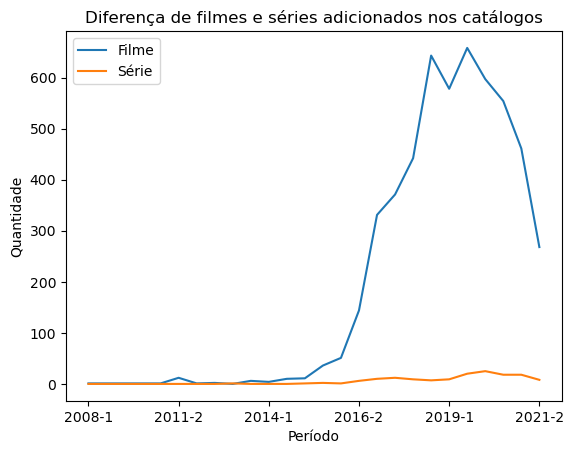

In [314]:
# Importamos o matplotlib uma biblioteca para criação de gráficos
import matplotlib.pyplot as plt

# Utilizamos a função subplots que vai nos retornar no 2º argumento o eixo do gráfico
_, ax = plt.subplots()

# A função .crosstab do pandas nos retorna a relação dos dados entre diferentes colunas, neste caso 
#estamos obtendo os dados entre a coluna recém criada com as datas dividas em semestres e a 
#coluna type que descrimina se a produção é  uma série ou filme, a partir do resultado destes dados nós 
#vamos utilizar a função .plot que é uma função do pandas para exibir gráficos. 
#Esta função utiliza o Matplotlib por baixo dos panos.

pd.crosstab(base["date_added_as_cat"], base["type"]).plot(
    title="Diferença de filmes e séries adicionados nos catálogos",
    xlabel="Período",
    ylabel="Quantidade",
    ax=ax
);

ax.legend(["Filme", "Série"]);


##### Em resumo até aqui nós:

- Analisamos a base e enxergamos uma grande variedade de registros que iríamos utilizar na nossa apresentação.

- Criamos uma nova coluna que tem como objetivo agrupar estes registros.

- Construímos um gráfico a partir dos dados agrupados.